<a href="https://colab.research.google.com/github/akarsh27/Sentimental-Analysis-covid19/blob/main/Sentimental_Analysis_on_covid_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Importing the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


lets the check the shape of dataframe

In [ ]:
df.shape

(179108, 13)

lets select the needed column for our project

In [ ]:
needed_columns = ['user_name','date','text']
df = df[needed_columns]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


change the type of some columns

In [ ]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


picking up the tweet text

In [ ]:
texts = df['text']
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Removing URLs from tweets

In [ ]:
remove_url = lambda x: re.sub('https\S+' , '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Converting all tweets to lowercase

In [ ]:
to_lower = lambda x : x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

Reomving Punctuations

In [ ]:
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104               2020 the year of insanity lol covid19 
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

Removing stopwords

In [ ]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
from nltk.corpus import stopwords
stop_words =set(stopwords.words('english'))
stop_words.update(more_words)

remove_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

let's create a big list of words out of all the tweets

In [ ]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [ ]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word','frq']

px.bar(words_df, x='word',y='frq',title='Most common words')

put the clean text in main dataframe

In [ ]:
df.texts = texts_lr_lc_np_ns
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


### **Sentiment** **Analysis**




getting the polarity scores for each tweet

In [ ]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...
1         {'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'co...
2         {'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou...
3         {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...
4         {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
179104    {'neg': 0.342, 'neu': 0.449, 'pos': 0.209, 'co...
179105    {'neg': 0.148, 'neu': 0.738, 'pos': 0.115, 'co...
179106    {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...
179107    {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [ ]:
sentiment_df =pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.862,0.138,0.4939
1,0.059,0.844,0.097,0.2263
2,0.110,0.890,0.000,-0.2732
3,0.000,0.754,0.246,0.7351
4,0.000,0.839,0.161,0.3182


Labelling the scores based on the compound polarity value

In [ ]:
labelize = lambda x : 'neutral 'if x==0 else('postive' if x> 0 else 'negative') 
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,0.862,0.138,0.4939,postive
1,0.059,0.844,0.097,0.2263,postive
2,0.110,0.890,0.000,-0.2732,negative
3,0.000,0.754,0.246,0.7351,postive
4,0.000,0.839,0.161,0.3182,postive


Join Two DataFrames

In [ ]:
data = df.join(sentiment_df.label)
data.head()


,user_name,date,text,label
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...,postive
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,postive
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,negative
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,postive
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,postive


plotting the sentiment score counts

In [ ]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,postive,67961
1,neutral,63403
2,negative,47744


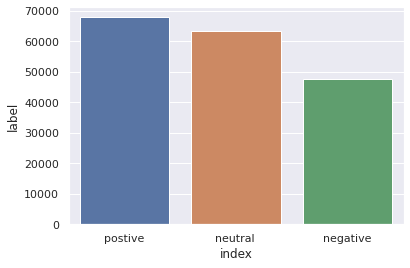

In [ ]:
sns.barplot(x='index',y='label',data=counts_df)

In [ ]:
data.head()

,user_name,date,text,label
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...,postive
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,postive
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,negative
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,postive
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,postive


In [ ]:
data_agg = data[['user_name','date','label']].groupby(['date','label']).count().reset_index()
data_agg.columns = ['date', 'label','counts']
data_agg.head()

,date,label,counts
0,2020-07-24,negative,92
1,2020-07-24,neutral,96
2,2020-07-24,postive,107
3,2020-07-25,negative,4458
4,2020-07-25,neutral,5880


In [ ]:
px.line(data_agg, x='date', y='counts',color='label',title='daily tweets sentiment Anlaysis')